# Explore here

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

In [123]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'

data = pd.read_csv(url)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
X = data.drop(["Outcome"], axis = 1)
y = data["Outcome"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [126]:
print(f'Dataset total: {X.shape}')
print(f'Dataset entrenamiento: {X_train.shape}')
print(f'Dataset prueba: {X_test.shape}')

Dataset total: (768, 8)
Dataset entrenamiento: (614, 8)
Dataset prueba: (154, 8)


In [134]:
model = RandomForestClassifier(n_estimators=100 ,random_state=42)
model.fit(X_train, y_train)
y_pred_base = model.predict(X_test)
print(f"F1-score (Base): {f1_score(y_test, y_pred_base):.4f}")


F1-score (Base): 0.6126


In [135]:
grid_params = {
    'n_estimators' :[50, 100, 200],
    'max_depth' :[5, 10, 20, None],
    'min_samples_split' :[2, 5, 10],
    'min_samples_leaf' :[1, 2, 4],
}

grid_seach = GridSearchCV(model, grid_params, cv=5, scoring='f1', n_jobs=1, verbose=1)

grid_seach.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [136]:
best_model = grid_seach.best_estimator_

In [137]:
grid_seach.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50,
                       random_state=42)

In [138]:
y_pred = best_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [141]:
y_proba = best_model.predict_proba(X_test)[:, 1]
y_proba

array([4.33666667e-01, 1.88456603e-01, 1.51844701e-01, 2.94708223e-01,
       5.22050982e-01, 5.74190476e-01, 2.01408451e-02, 6.92598784e-01,
       5.25277549e-01, 5.50430795e-01, 1.91844405e-01, 7.29333333e-01,
       3.40978723e-01, 4.75711305e-01, 3.14285714e-02, 4.62095238e-01,
       1.05802751e-01, 3.24761905e-02, 4.86416667e-01, 4.04662517e-01,
       3.22806463e-01, 1.54063272e-01, 2.80840553e-01, 2.59503689e-02,
       5.44851810e-01, 9.58939394e-01, 7.55714286e-02, 2.32360832e-02,
       1.69318182e-01, 2.23464552e-01, 7.98842274e-01, 6.61499516e-01,
       7.61391902e-01, 8.19778317e-01, 6.20642857e-01, 6.68034759e-01,
       8.51047619e-01, 5.17631110e-01, 2.09626206e-01, 7.40435897e-01,
       9.53789403e-02, 2.95809524e-01, 6.17620676e-01, 4.08697188e-01,
       9.05714286e-02, 5.93857553e-01, 6.30000000e-01, 1.96346075e-01,
       2.53846154e-01, 8.23181818e-01, 5.14084507e-03, 7.63383838e-01,
       7.32666667e-01, 3.09707242e-01, 5.40000000e-02, 2.76170355e-02,
      

In [142]:
print("\n🔹 Mejor modelo:", best_model)
print(f"🔹 F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"🔹 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"🔹 AUC: {roc_auc_score(y_test, y_proba):.4f}")


🔹 Mejor modelo: RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50,
                       random_state=42)
🔹 F1-score: 0.6429
🔹 Accuracy: 0.7403
🔹 AUC: 0.8233


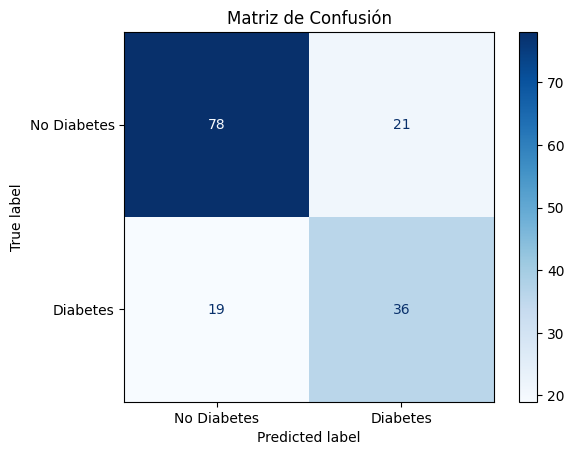

In [144]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

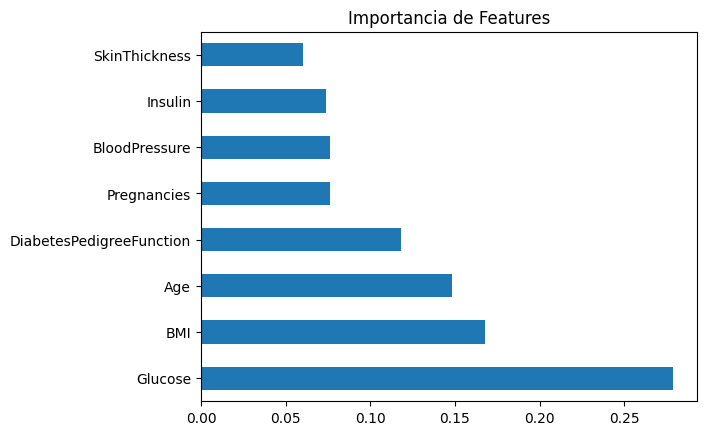

In [145]:
importances = best_model.feature_importances_
feature_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feature_imp.plot(kind='barh', title='Importancia de Features')
plt.show()